# Imports

In [36]:
import keras
from keras import layers
from sklearn.datasets import load_breast_cancer 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


In [37]:
import warnings
warnings.filterwarnings("ignore")

# Importing Wisconsin Breast Cancer Dataset from sklearn

In [38]:
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [39]:
X = data.data
y = data.target

# Creating two dataframes (features and respective targets) for EDA

In [40]:
features = pd.DataFrame(X, columns = data.feature_names)
targets = pd.DataFrame(y, columns = ['target'])

In [41]:
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [42]:
features.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [43]:
targets.isnull().sum()

target    0
dtype: int64

In [44]:
targets.value_counts()

target
1         357
0         212
Name: count, dtype: int64

In [45]:
count_m = targets[targets['target'] == 0].shape[0]
count_b = targets[targets['target'] == 1].shape[0]

percentage_m = (count_m/targets.shape[0]) * 100
percentage_b = (count_b/targets.shape[0]) * 100

print('Percentage of malign examples: ', percentage_m)
print('Percentage of benign examples: ', percentage_b)

Percentage of malign examples:  37.258347978910365
Percentage of benign examples:  62.741652021089635


# Train test split + data standardization + shuffling
- Using min max scaler to standardize the data, as features were quite different distributed
- Test size = 0.25, as we do not have too much data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=36)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=36)

# Building model with Keras 
- Input shape = 30, output shape = probability (value between 0 and 1)
- 7 layers, 8 neurons in the hidden layers, he_normal weight initializer, l2 + dropout regularization, final sigmoid activation

In [47]:
model_1 = keras.models.Sequential([ # more layers and regularization
    keras.layers.Flatten(input_shape=[30]),
    keras.layers.Dense(8, activation='relu', kernel_initializer = 'he_normal'),
    keras.layers.Dense(8, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(8, activation='relu'), #kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
print(model_1.summary())
# As we are using dropout during training, there is a higher loss during training than during validation! The model is hence more robust during val than train due to dropout

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


# Training the model
- Loss = Binary Cross Entropy
- Optimizer = Adam at 0.001 learning rate
- Metric = accuracy
- Batch size = 64
- Epochs = 300

In [49]:
model_1.compile(loss='BinaryCrossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),  metrics = ['accuracy'])
history = model_1.fit(X_train_shuffled, y_train_shuffled, batch_size = 64, epochs = 300, validation_data = (X_test, y_test))

Epoch 1/300


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5704 - loss: 0.7863 - val_accuracy: 0.6667 - val_loss: 0.7736
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6055 - loss: 0.7779 - val_accuracy: 0.6784 - val_loss: 0.7664
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6106 - loss: 0.7718 - val_accuracy: 0.6784 - val_loss: 0.7596
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6106 - loss: 0.7671 - val_accuracy: 0.6784 - val_loss: 0.7527
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6131 - loss: 0.7576 - val_accuracy: 0.6842 - val_loss: 0.7462
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6231 - loss: 0.7554 - val_accuracy: 0.6901 - val_loss: 0.7394
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6407 - loss: 0.7471 - val_accuracy: 0.6901 - val_loss: 0.7322
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6533 - loss: 0.7403 - val_accuracy: 0.6959 - val_loss: 0.7242
Epoch 9/300

# Plotting loss and accuracy
- We can observe that the model correctly learns to classify between benign (1) and malign (0) after 300 epochs
- The validation loss is lower than the training loss, probably because we are using the dropout regularization technique in the training phase of the model, hence making more robust predictions during validation than training

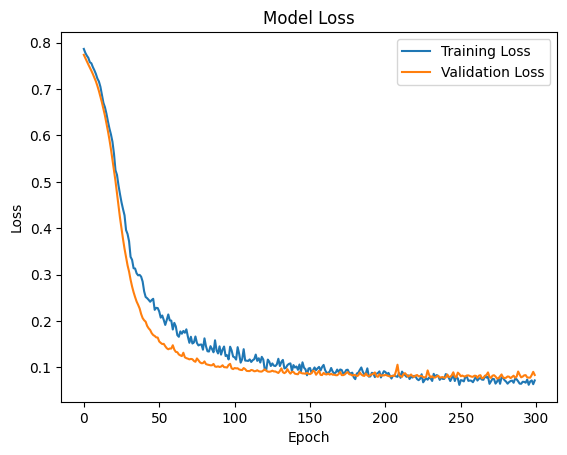

In [50]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

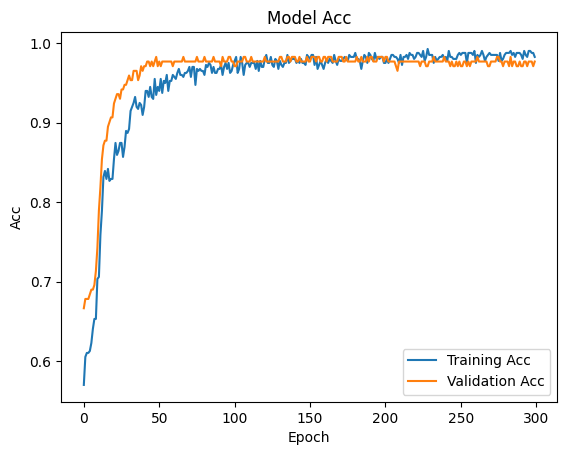

In [51]:
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Model Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

# Visualizing some accuracy scores to better understand the model results and convergence

In [52]:
history.history['accuracy'][0:15]

[0.570351779460907,
 0.6055276393890381,
 0.6105527877807617,
 0.6105527877807617,
 0.6130653023719788,
 0.623115599155426,
 0.6407034993171692,
 0.6532663106918335,
 0.6532663106918335,
 0.7035176157951355,
 0.7060301303863525,
 0.7587939500808716,
 0.7889447212219238,
 0.8316583037376404,
 0.839195966720581]

In [53]:
history.history['accuracy'][285:299]

[0.9874371886253357,
 0.9824120402336121,
 0.9874371886253357,
 0.9874371886253357,
 0.9874371886253357,
 0.9849246144294739,
 0.979899525642395,
 0.9899497628211975,
 0.9849246144294739,
 0.9824120402336121,
 0.9899497628211975,
 0.9899497628211975,
 0.9874371886253357,
 0.9874371886253357]

# Comparing model's predictions with the test data for a visual understanding of the results

In [54]:
preds = model_1.predict(X_test)
y_pred_classes = (preds > 0.5).astype(int) # turning the predictions (probabilities) into classes (0 or 1) with a 0.5 threshold

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [55]:
preds[0:10]

array([[9.9984789e-01],
       [9.9953854e-01],
       [9.9339581e-01],
       [9.9078959e-01],
       [9.9978310e-01],
       [1.2447232e-07],
       [2.7727810e-06],
       [9.9869847e-01],
       [9.7915637e-01],
       [9.9773926e-01]], dtype=float32)

In [56]:
y_pred_classes[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [57]:
y_test[0:10]

,target
63,1
525,1
500,1
292,1
46,1
108,0
323,0
386,1
377,1
467,1


In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

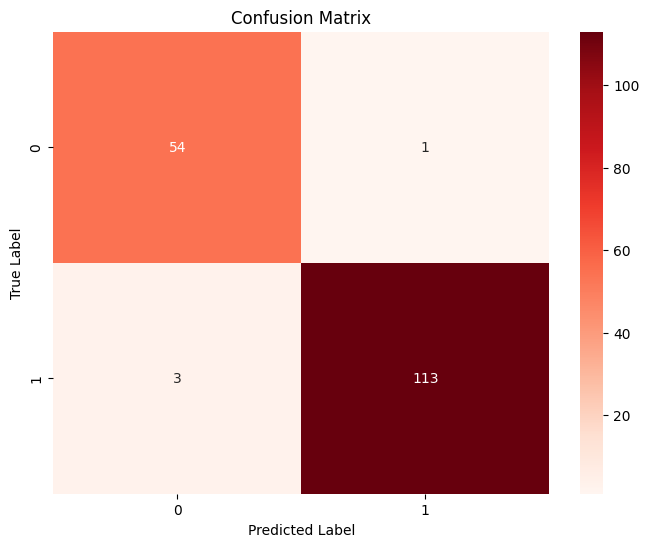

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## We train the same model, but this time with a reduced amount of features 

In [60]:
selected_features = ['mean texture', 'mean area', 'mean smoothness', 'mean concavity',
       'mean fractal dimension', 'area error', 'concavity error',
       'fractal dimension error', 'worst smoothness', 'worst concavity',
       'worst symmetry', 'worst fractal dimension']

features_reduced = features[selected_features]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features_reduced, targets, test_size=0.3, random_state=36)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=36)

In [62]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[12]),  # Changed from 30 to 12
    keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
model_2.compile(loss='BinaryCrossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),  metrics = ['accuracy'])
history_less_feats = model_2.fit(X_train_shuffled, y_train_shuffled, batch_size = 64, epochs = 300, validation_data = (X_test, y_test))

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5276 - loss: 0.7602 - val_accuracy: 0.5205 - val_loss: 0.7599
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6181 - loss: 0.7536 - val_accuracy: 0.7193 - val_loss: 0.7487
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6759 - loss: 0.7558 - val_accuracy: 0.8421 - val_loss: 0.7362
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6985 - loss: 0.7394 - val_accuracy: 0.8246 - val_loss: 0.7230
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6884 - loss: 0.7274 - val_accuracy: 0.7544 - val_loss: 0.7108
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6809 - loss: 0.7156 - val_accuracy: 0.7368 - val_loss: 0.6988
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6508 - loss: 0.7143 - val_accuracy: 0.7368 - val_loss: 0.6880
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6608 - loss: 0.6985 - val_accuracy: 0.7368 - val_loss: 0.677

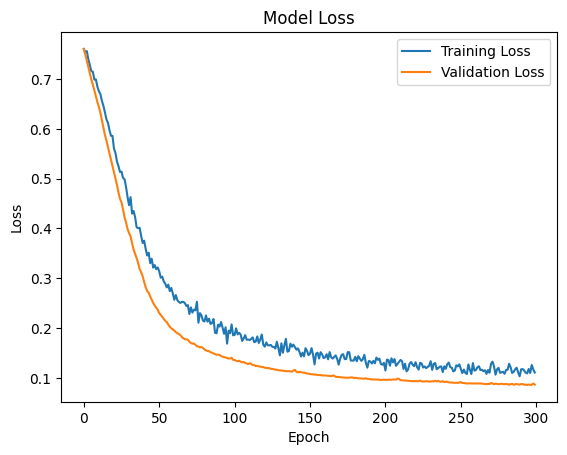

In [65]:
plt.plot(history_less_feats.history['loss'], label='Training Loss')
plt.plot(history_less_feats.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

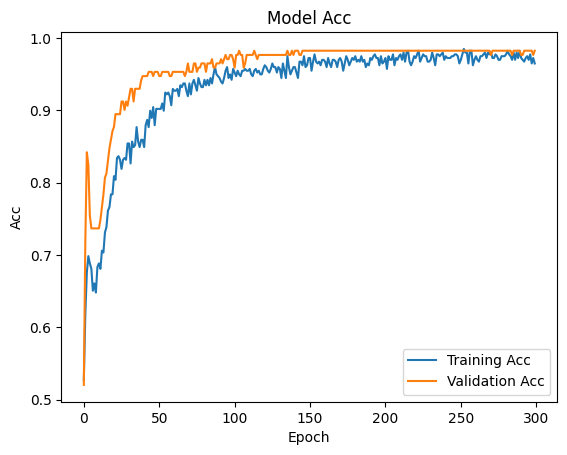

In [66]:
plt.plot(history_less_feats.history['accuracy'], label='Training Acc')
plt.plot(history_less_feats.history['val_accuracy'], label='Validation Acc')
plt.title('Model Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

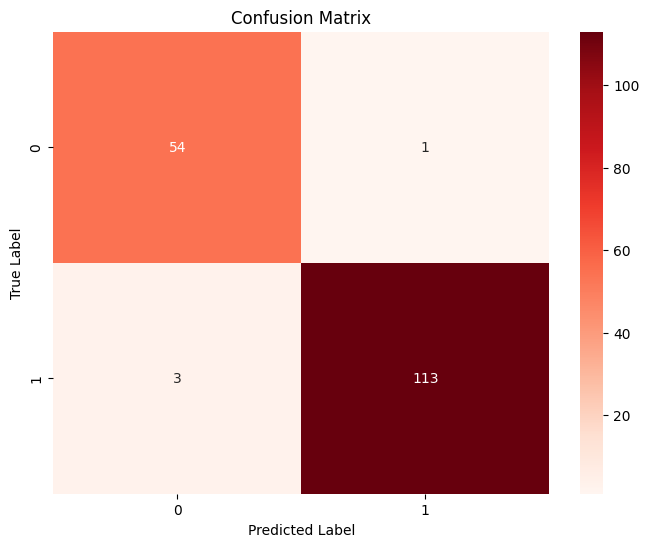

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()